# Capstone Project - Predicting Kickstarter Project Outcomes

## Part 2 - Modelling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-2---Modelling" data-toc-modified-id="Part-2---Modelling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 2 - Modelling</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Baseline-Models" data-toc-modified-id="Baseline-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Baseline Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes---Gaussian" data-toc-modified-id="Naive-Bayes---Gaussian-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Naive Bayes - Gaussian</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Stacking</a></span></li></ul></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span></li><li><span><a href="#Parameter-Tuning" data-toc-modified-id="Parameter-Tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Parameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Adaboost" data-toc-modified-id="Adaboost-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Adaboost</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Skewed-Features---Transformation" data-toc-modified-id="Skewed-Features---Transformation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Skewed Features - Transformation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance
from mlxtend.classifier import StackingClassifier

In [2]:
# settings to display all columns, increase column width
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', 100)

## Read Data

Data was cleaned and exported from part 1 of this project.

In [3]:
df = pd.read_csv('data/data_clean.csv')

In [4]:
df.head()

,id,slug,name,blurb,category,created_at,launched_at,deadline,state_changed_at,backers_count,status,currency,currency_symbol,goal,pledged,usd_pledged,static_usd_rate,currency_trailing_code,staff_pick,spotlight,country,country_name,location,creator,photo,profile,source_url,urls,snapshot_date,sub_category,days_since_launch,days_created_to_launch,days_since_creation,usd_goal,name_word_count,name_polarity,name_subjectivity,blurb_word_count,blurb_polarity,blurb_subjectivity,year_month,year,region
0,1257466408,dino-beasts-book-2,Dino Beasts book,The Reckoning,Comics,2020-03-09 22:20:27,2020-03-10 21:55:31,2020-03-30 21:55:31,2020-03-30 21:55:31,36,successful,USD,$,1000.0,1317.0,1317.000000,1.0000,True,False,True,US,US,"{""id"":2391446,""name"":""Des Moines"",""slug"":""des-moines-ia"",""short_name"":""Des Moines, IA"",""displaya...","{""id"":1764299439,""name"":""John Coats"",""is_registered"":null,""is_email_verified"":null,""chosen_curre...","{""key"":""assets/028/378/481/7c9704dc35e216617401fb71d0d78f98_original.jpg"",""full"":""https://ksr-ug...","{""id"":3950016,""project_id"":3950016,""state"":""inactive"",""state_changed_at"":1583792427,""name"":null,...",https://www.kickstarter.com/discover/categories/comics/graphic%20novels,{'web': {'project': 'https://www.kickstarter.com/projects/1764299439/dino-beasts-book-2?ref=disc...,2022-12-01,Graphic Novels,20,0,20,1000.0000,4,0.0,0.0,2,0.00,0.00,2020-03-01,2020,North America
1,1288312459,the-creek-nathan-hales-literary-magazine,The Creek Nathan Hale's Literary Magazine,Help us continue Nathan Hale High School's literary magazine The Creek,Publishing,2014-11-30 17:57:57,2015-03-17 02:57:36,2015-03-31 05:00:00,2015-03-31 05:00:17,17,successful,USD,$,450.0,475.0,475.000000,1.0000,True,False,True,US,US,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle-wa"",""short_name"":""Seattle, WA"",""displayable_name""...","{""id"":1685317562,""name"":""Henrietta Hadley"",""is_registered"":null,""is_email_verified"":null,""chosen...","{""key"":""assets/011/960/350/987d652ba07428edaf6c41ebd8485cfa_original.JPG"",""full"":""https://ksr-ug...","{""id"":1547198,""project_id"":1547198,""state"":""inactive"",""state_changed_at"":1425915885,""name"":null,...",https://www.kickstarter.com/discover/categories/publishing/literary%20journals,{'web': {'project': 'https://www.kickstarter.com/projects/1685317562/the-creek-nathan-hales-lite...,2022-12-01,Literary Journals,14,106,120,450.0000,6,0.1,0.1,12,0.13,0.32,2015-03-01,2015,North America
2,294415224,the-worlds-toughest-headphones,The World's Toughest Headphones,They sound like a dream but can survive a nightmare Ruggedized waterproof smash proof the Rhinos...,Technology,2016-12-16 20:10:48,2017-02-07 12:59:16,2017-03-09 12:59:16,2017-03-09 12:59:16,337,successful,USD,$,40000.0,49002.0,49002.000000,1.0000,True,False,True,US,US,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los-angeles-ca"",""short_name"":""Los Angeles, CA"",""displ...","{""id"":983949817,""name"":""Outdoor Tech® Design Lab"",""slug"":""outdoortech"",""is_registered"":null,""is_...","{""key"":""assets/014/911/830/a6fcb815ad652999d0924962e9d9bab7_original.jpg"",""full"":""https://ksr-ug...","{""id"":2802214,""project_id"":2802214,""state"":""active"",""state_changed_at"":1558453107,""name"":""The Wo...",https://www.kickstarter.com/discover/categories/technology/sound,{'web': {'project': 'https://www.kickstarter.com/projects/outdoortech/the-worlds-toughest-headph...,2022-12-01,Sound,30,52,82,40000.0000,4,0.0,0.0,22,0.40,0.40,2017-02-01,2017,North America
3,1992029403,ekko-bluetooth-wireless-amp-power-any-speaker-anyw,Ekko The Best Bluetooth Music Using Any Speaker Anywhere,Turn real speakers into the best sounding bluetooth stereo speakers with Ekko Play hours of cont...,Technology,2016-08-13 16:25:59,2017-01-31 15:45:35,2017-03-12 14:45:35,2017-03-12 14:45:35,48,successful,USD,$,12700.0,13460.0,13460.000000,1.0000,True,False,True,US,US,"{""id"":2465890,""name"":""Orange"",""slug"":"

In [5]:
df.isnull().sum()

id                           0
slug                         0
name                         0
blurb                        0
category                     0
created_at                   0
launched_at                  0
deadline                     0
state_changed_at             0
backers_count                0
status                       0
currency                     0
currency_symbol              0
goal                         0
pledged                      0
usd_pledged                  0
static_usd_rate              0
currency_trailing_code       0
staff_pick                   0
spotlight                    0
country                      0
country_name                 0
location                   189
creator                      0
photo                        0
profile                      0
source_url                   0
urls                         0
snapshot_date                0
sub_category              7347
days_since_launch            0
days_created_to_launch       0
days_sin

There are still some null values in location and sub_category. Location will not be used for modelling, but the missing sub_category need to be imputed. 

## Data Preprocessing

Further pre-processing is required for some features. 

In [6]:
df['category'].nunique()

15

In [7]:
df['sub_category'].nunique()

146

Due to the high number of unique sub categories, this may be problematic when we convert them into dummy variables, resulting in a sparse matrix. 

We will do some feature engineering to combine the category and sub category. Then group the less frequent sub categories as 'other'.

In [8]:
# impute null sub category as 'other'
df['sub_category'] = df['sub_category'].fillna('other')

# combine category and sub category
df['cat_combined'] = df['category'] + '_' + df['sub_category']

In [9]:
df['cat_combined'].nunique()

171

In [10]:
df['cat_combined'].isnull().sum()

0

In [11]:
# force as str type
df['cat_combined'] = df['cat_combined'].astype(str)

In [12]:
# total percentage of each category combination within dataset

df['cat_combined'].value_counts(normalize=True)*100

Design_Product Design    1.615442
Comics_Graphic Novels    1.485850
Publishing_Fiction       1.326352
Film & Video_Comedy      1.308513
Technology_Software      1.279132
                           ...   
Crafts_Quilts            0.047744
Dance_Residencies        0.046695
Music_Chiptune           0.027283
Games_other              0.020462
Crafts_Taxidermy         0.005771
Name: cat_combined, Length: 171, dtype: float64

In [13]:
# index of the categories that have large count in data (larger than 1% of total data)
cat_top_1pct = df['cat_combined'].value_counts(normalize=True)*100 > 1

# list of the top categories
cat_top_list = df['cat_combined'].value_counts()[cat_top_1pct].index

In [14]:
cat_top_list

Index(['Design_Product Design', 'Comics_Graphic Novels', 'Publishing_Fiction',
       'Film & Video_Comedy', 'Technology_Software', 'Music_Pop',
       'Design_Graphic Design', 'Photography_Photobooks',
       'Music_Classical Music', 'Music_Rock', 'Film & Video_Webseries',
       'Art_Mixed Media', 'Music_Indie Rock', 'Film & Video_Narrative Film',
       'Art_Public Art', 'Art_Digital Art', 'Technology_Hardware',
       'Music_Electronic Music', 'Publishing_Art Books', 'Technology_Web',
       'Film & Video_Drama', 'Music_Hip-Hop', 'Food_Small Batch',
       'Art_Painting', 'Food_Restaurants', 'Fashion_Accessories',
       'Music_World Music', 'Film & Video_Animation', 'Food_Drinks',
       'Film & Video_Documentary', 'Publishing_Nonfiction',
       'Technology_Gadgets', 'Games_Mobile Games', 'Music_Country & Folk',
       'Film & Video_Shorts', 'Fashion_Apparel', 'Games_Playing Cards',
       'Comics_Comic Books', 'Technology_Apps', 'Art_Illustration',
       'Publishing_Children's 

In [15]:
# this function checks if the combined category is in the top category list
# if not, replaces the subcategory with 'other'

def replace_other(row):
    if '_' in row:
        cat, sub_cat = row.split("_")
        if row not in cat_top_list:
            sub_cat = "other"
        return f"{cat}_{sub_cat}"

In [16]:
# apply function
df['cat_combined'] = df['cat_combined'].apply(replace_other)

In [17]:
df['cat_combined'].nunique()

62

Now we are down to 62 unique category & subcategory combinations.

In [18]:
# example values
df['cat_combined'].value_counts().head(50)

Publishing_other               10059
Film & Video_other              9493
Technology_other                7825
Crafts_other                    6615
Food_other                      6055
Fashion_other                   5636
Theater_other                   5456
Music_other                     5047
Journalism_other                4253
Photography_other               4202
Art_other                       4072
Dance_other                     3082
Design_Product Design           3079
Comics_Graphic Novels           2832
Comics_other                    2698
Design_other                    2636
Publishing_Fiction              2528
Film & Video_Comedy             2494
Technology_Software             2438
Music_Pop                       2410
Design_Graphic Design           2410
Games_other                     2399
Photography_Photobooks          2371
Music_Rock                      2370
Music_Classical Music           2370
Film & Video_Webseries          2370
Art_Mixed Media                 2363
F

Format is 'category_subcategory'. Note that many subcategories have been replaced with 'other' and grouped together. 

Those with high count have still retained the subcategory information (e.g. Design_Product Design).

Next map the target variable as 1 or 0 according to outcome.

In [19]:
# map target column to 1 or 0
df['status'] = df['status'].replace({'successful':1, 'failed':0})

In [20]:
df.columns

Index(['id', 'slug', 'name', 'blurb', 'category', 'created_at', 'launched_at',
       'deadline', 'state_changed_at', 'backers_count', 'status', 'currency',
       'currency_symbol', 'goal', 'pledged', 'usd_pledged', 'static_usd_rate',
       'currency_trailing_code', 'staff_pick', 'spotlight', 'country',
       'country_name', 'location', 'creator', 'photo', 'profile', 'source_url',
       'urls', 'snapshot_date', 'sub_category', 'days_since_launch',
       'days_created_to_launch', 'days_since_creation', 'usd_goal',
       'name_word_count', 'name_polarity', 'name_subjectivity',
       'blurb_word_count', 'blurb_polarity', 'blurb_subjectivity',
       'year_month', 'year', 'region', 'cat_combined'],
      dtype='object')

Now we drop the features that will not be used to predict outcome. These include any feature that has future information (e.g. pledged), redundant information (e.g. currency_symbol) and not useful information (e.g. source_url). 

In [21]:
drop_col = [
    'id', 'slug', 'name', 'blurb', 'backers_count', 'created_at', 'category', 'sub_category',
    'launched_at', 'deadline', 'state_changed_at', 'currency',
    'currency_symbol', 'goal', 'pledged', 'usd_pledged', 'static_usd_rate',
    'currency_trailing_code', 'staff_pick', 'spotlight', 'country', 'location',
    'creator', 'photo', 'profile', 'source_url', 'urls', 'snapshot_date',
    'days_since_creation', 'year_month', 'year', 'region'
]

In [22]:
df.drop(columns=drop_col, inplace=True)

In [23]:
df.head()

,status,country_name,days_since_launch,days_created_to_launch,usd_goal,name_word_count,name_polarity,name_subjectivity,blurb_word_count,blurb_polarity,blurb_subjectivity,cat_combined
0,1,US,20,0,1000.0000,4,0.0,0.0,2,0.00,0.00,Comics_Graphic Novels
1,1,US,14,106,450.0000,6,0.1,0.1,12,0.13,0.32,Publishing_other
2,1,US,30,52,40000.0000,4,0.0,0.0,22,0.40,0.40,Technology_other
3,1,US,39,170,12700.0000,10,1.0,0.3,22,0.36,0.48,Technology_other
4,1,NZ,40,61,36319.9995,8,0.0,0.0,23,0.50,1.00,Technology_other


In [24]:
# for clarity, rename country_name to country, cat_combined as category

df.rename(columns={'country_name': 'country', 'cat_combined': 'category'}, inplace=True)

In [25]:
# convert categorical data into dummies
X = pd.get_dummies(df)

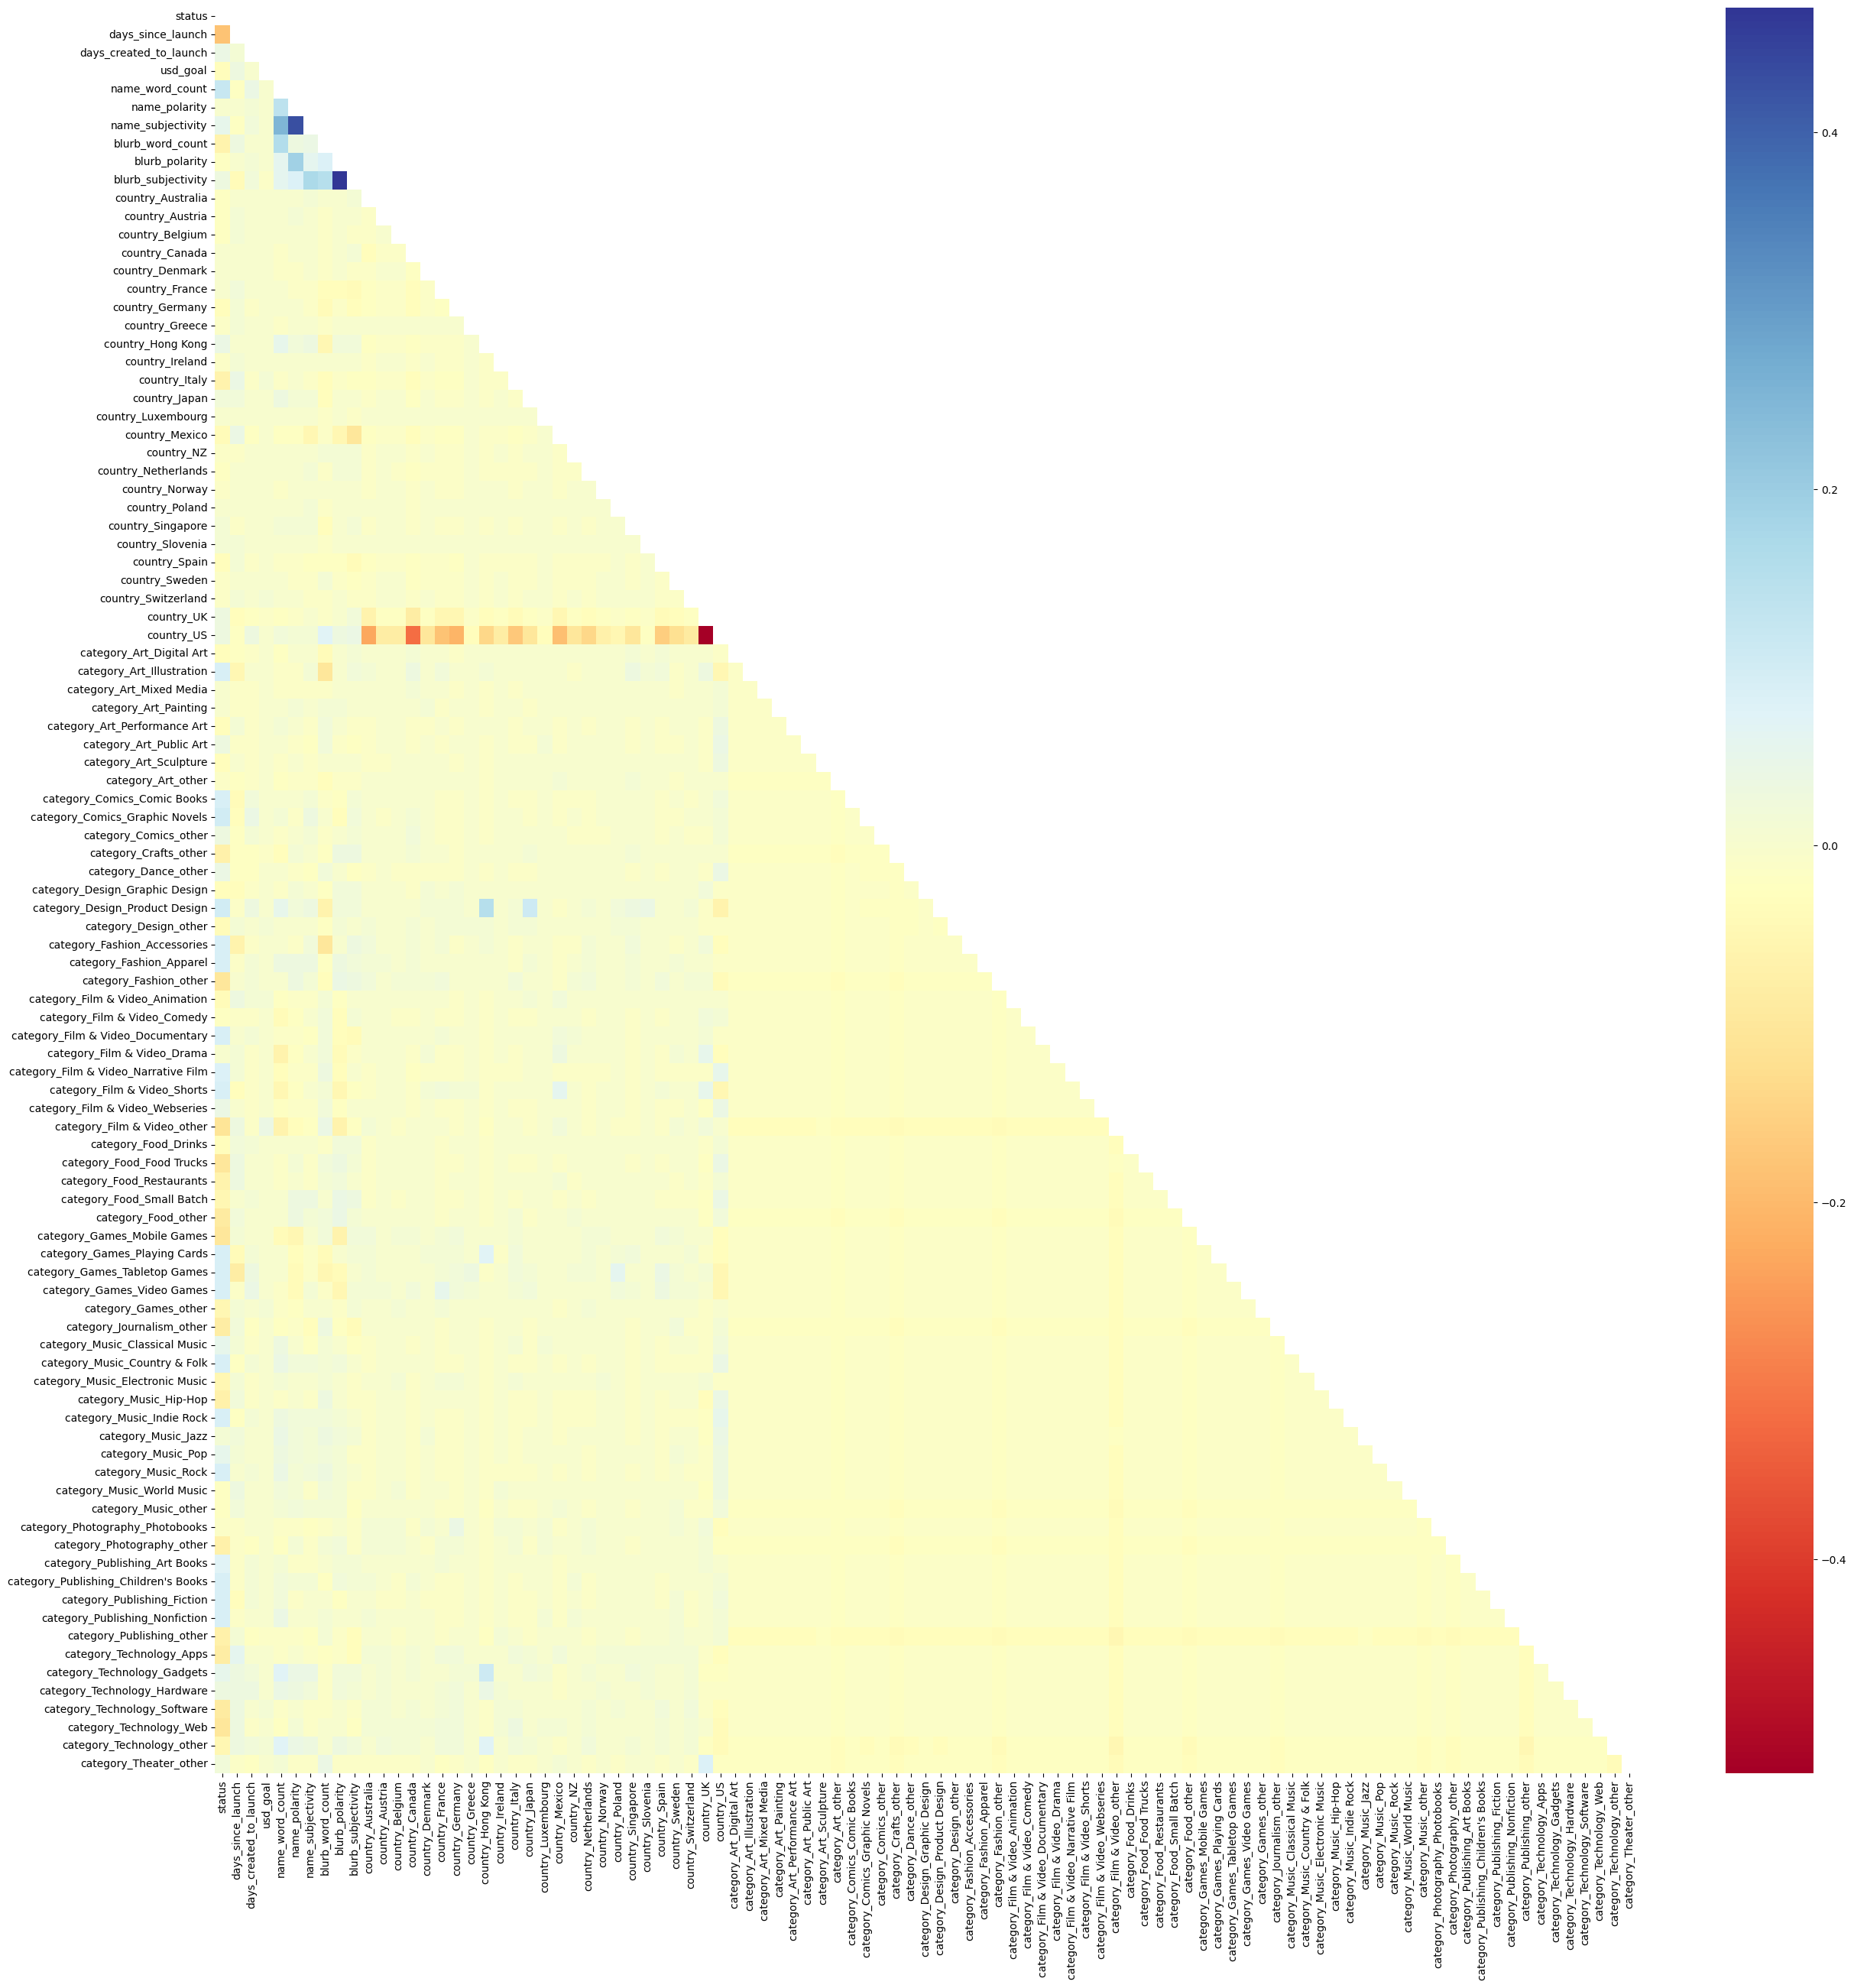

In [26]:
# check correlation
corr = X.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30,30)) 
ax = sns.heatmap(corr, mask=mask, cmap='RdYlBu')


This correlation matrix is just for a very rough visual check of highly correlated features. Looking at the legend, none of the correlation appear to go much beyond +0.5 or -0.5.

In [27]:
corr['status']

status                          1.00
days_since_launch              -0.18
days_created_to_launch          0.04
usd_goal                       -0.03
name_word_count                 0.12
                                ... 
category_Technology_Hardware    0.03
category_Technology_Software   -0.09
category_Technology_Web        -0.10
category_Technology_other      -0.05
category_Theater_other          0.02
Name: status, Length: 97, dtype: float64

We construct our feature matrix and set the target variable.

In [28]:
# feature matrix
X = X.drop(columns='status')

# target variable
y = df['status']

In [29]:
X.shape, y.shape

((190598, 96), (190598,))

After converting categories to dummy variables, we have 96 features which are mainly from the category information. 

This is still a large number, but as we have a reasonably large number of rows, we will proceed to baseline modelling to get the benchmark performance first.

In [30]:
# double check distribution of target variable

y.value_counts(normalize=True)

1    0.600552
0    0.399448
Name: status, dtype: float64

Distribution of target is around 6:4 between successful and failed projects, it is reasonably well balanced. Therefore we will not use sampling techniques for imbalance.

In [46]:
# split into train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Baseline Models

First the models are fit without any hyperparameter tuning, feature selection and dimensionality reduction to evaluate the baseline performance.

Data is split into train and test data within the helper functions as we utilise the pipeline.

In [31]:
def fit_baseline_model(clf, X, y):
    
    # split into train test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    
    # set up pipeline of standard scaler and model
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('model', clf)])
    
    # fit model
    pipe.fit(X_train, y_train)
    
    # prediction
    y_pred = pipe.predict(X_test)
    
    # get train, test, cross val scores
    train_acc = pipe.score(X_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    cvs = cross_val_score(pipe, X_train, y_train).mean()
    
    print(f'Training score:         {train_acc:.4f}')
    print(f'Cross validation score: {cvs:.4f}')
    print(classification_report(y_test, y_pred))
    print()
  
    return (train_acc, test_acc, cvs)

In [32]:
# initialise classifiers - can be reused again for parameter tuning

logreg = LogisticRegression(max_iter=10000)
gnb = GaussianNB()
rf = RandomForestClassifier(n_jobs=-1)
ada = AdaBoostClassifier() 
xgb = XGBClassifier()

### Logistic Regression

In [33]:
%%time
base_log_result = fit_baseline_model(logreg, X, y)

Training score:         0.7521
Cross validation score: 0.7510
              precision    recall  f1-score   support

           0       0.67      0.72      0.70     15127
           1       0.81      0.77      0.79     22993

    accuracy                           0.75     38120
   macro avg       0.74      0.75      0.74     38120
weighted avg       0.75      0.75      0.75     38120


CPU times: user 56.7 s, sys: 8.7 s, total: 1min 5s
Wall time: 9.82 s


Base logistic regression model achieved accuracy of 0.75. 

### Naive Bayes - Gaussian

In [34]:
%%time

base_gnb_result = fit_baseline_model(gnb, X, y)

Training score:         0.6367
Cross validation score: 0.6366
              precision    recall  f1-score   support

           0       0.52      1.00      0.68     15127
           1       0.99      0.39      0.56     22993

    accuracy                           0.63     38120
   macro avg       0.76      0.70      0.62     38120
weighted avg       0.81      0.63      0.61     38120


CPU times: user 1.32 s, sys: 31.2 ms, total: 1.35 s
Wall time: 1.36 s


Gaussian naive bayes models have achieved accuracy of 0.63. Note that precision is very high (0.99), but at the cost of reduced recall.

### Random Forest

In [35]:
%%time
base_rf_result = fit_baseline_model(rf, X, y)

Training score:         1.0000
Cross validation score: 0.7757
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     15127
           1       0.81      0.83      0.82     22993

    accuracy                           0.78     38120
   macro avg       0.77      0.77      0.77     38120
weighted avg       0.78      0.78      0.78     38120


CPU times: user 1min 3s, sys: 5.02 s, total: 1min 8s
Wall time: 45.8 s


Random forest has achieved the highest accuracy of 0.78 so far. But the high training score suggests overfitting is present and the model is not well generalised. 

### AdaBoost

In [36]:
%%time
base_ada_result = fit_baseline_model(ada, X, y)

Training score:         0.7663
Cross validation score: 0.7649
              precision    recall  f1-score   support

           0       0.71      0.70      0.70     15127
           1       0.80      0.81      0.81     22993

    accuracy                           0.76     38120
   macro avg       0.75      0.75      0.75     38120
weighted avg       0.76      0.76      0.76     38120


CPU times: user 29 s, sys: 258 ms, total: 29.2 s
Wall time: 29.5 s


Adaboost achieved accuracy of 0.76, just 1 percentage point better than logistic regression.

### XGBoost

In [37]:
%%time
base_xgb_result = fit_baseline_model(xgb, X, y)

Training score:         0.7958
Cross validation score: 0.7830
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     15127
           1       0.82      0.83      0.82     22993

    accuracy                           0.78     38120
   macro avg       0.77      0.77      0.77     38120
weighted avg       0.78      0.78      0.78     38120


CPU times: user 9min 52s, sys: 16.8 s, total: 10min 8s
Wall time: 1min 28s


XGBoost has accuracy of 0.78, similar to random forest.

### Stacking

Stacking is something I tried last minute, so hasn't been included in the final results and presentation.

In [100]:
# try stacking decision tree, random forest and gaussian naive bayes
dt = DecisionTreeClassifier()

sclf = StackingClassifier(
     classifiers = [rf, gnb, dt],
    meta_classifier = logreg)

In [101]:
base_stack_result = fit_baseline_model(sclf, X, y)

Training score:         1.0000
Cross validation score: 0.7288
              precision    recall  f1-score   support

           0       0.76      0.54      0.63     15127
           1       0.74      0.89      0.81     22993

    accuracy                           0.75     38120
   macro avg       0.75      0.71      0.72     38120
weighted avg       0.75      0.75      0.74     38120




Discrepancy between training and cross validation score suggests overfitting, similar to the random forest model.

In [38]:
# put each baseline model results into dataframe

base_results = {
    'Log': base_log_result,
    'Gaussian NB': base_gnb_result,
    'Random Forest': base_rf_result,
    'Adaboost': base_ada_result,
    'XGBoost': base_xgb_result
#     'Stack': base_stack_result
}

df_base_results = pd.DataFrame.from_dict(
    base_results,
    orient='index',
    columns=['train_score', 'test_score', 'cross_val_score'])

df_base_results.round(3)

,train_score,test_score,cross_val_score
Log,0.752,0.751,0.751
Gaussian NB,0.637,0.633,0.637
Random Forest,1.000,0.779,0.776
Adaboost,0.766,0.765,0.765
XGBoost,0.796,0.783,0.783


## Principal Component Analysis (PCA)

Can we improve the baseline models from dimensionality reduction?

In [39]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [40]:
pca = PCA()
pca.fit(X_scaled)
cumulative_exp_var = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Explained variance')

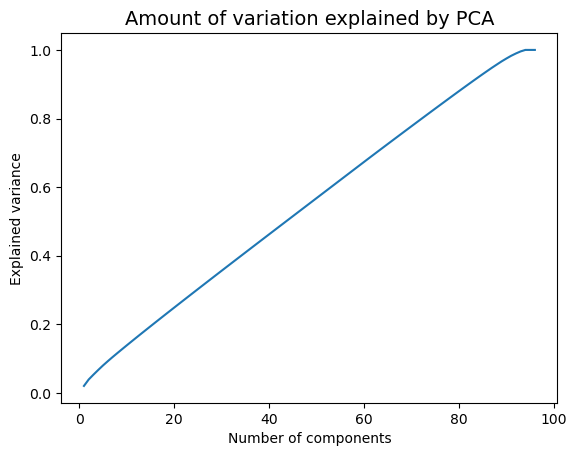

In [41]:
plt.plot(list(range(1, len(X.columns)+1)), cumulative_exp_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

This is a strange plot as the explained variance seems to increase linearly with the number of components. Usually, some elbow is observed where a large proportion of variance is explained by a small number of components.

In [42]:
df_components = pd.DataFrame(pca.components_.round(4), columns=X.columns)
max_features = df_components.idxmax()

In [43]:
df_components

,days_since_launch,days_created_to_launch,usd_goal,name_word_count,name_polarity,name_subjectivity,blurb_word_count,blurb_polarity,blurb_subjectivity,country_Australia,country_Austria,country_Belgium,country_Canada,country_Denmark,country_France,country_Germany,country_Greece,country_Hong Kong,country_Ireland,country_Italy,country_Japan,country_Luxembourg,country_Mexico,country_NZ,country_Netherlands,country_Norway,country_Poland,country_Singapore,country_Slovenia,country_Spain,country_Sweden,country_Switzerland,country_UK,country_US,category_Art_Digital Art,category_Art_Illustration,category_Art_Mixed Media,category_Art_Painting,category_Art_Performance Art,category_Art_Public Art,category_Art_Sculpture,category_Art_other,category_Comics_Comic Books,category_Comics_Graphic Novels,category_Comics_other,category_Crafts_other,category_Dance_other,category_Design_Graphic Design,category_Design_Product Design,category_Design_other,category_Fashion_Accessories,category_Fashion_Apparel,category_Fashion_other,category_Film & Video_Animation,category_Film & Video_Comedy,category_Film & Video_Documentary,category_Film & Video_Drama,category_Film & Video_Narrative Film,category_Film & Video_Shorts,category_Film & Video_Webseries,category_Film & Video_other,category_Food_Drinks,category_Food_Food Trucks,category_Food_Restaurants,category_Food_Small Batch,category_Food_other,category_Games_Mobile Games,category_Games_Playing Cards,category_Games_Tabletop Games,category_Games_Video Games,category_Games_other,category_Journalism_other,category_Music_Classical Music,category_Music_Country & Folk,category_Music_Electronic Music,category_Music_Hip-Hop,category_Music_Indie Rock,category_Music_Jazz,category_Music_Pop,category_Music_Rock,category_Music_World Music,category_Music_other,category_Photography_Photobooks,category_Photography_other,category_Publishing_Art Books,category_Publishing_Children's Books,category_Publishing_Fiction,category_Publishing_Nonfiction,category_Publishing_other,category_Technology_Apps,category_Technology_Gadgets,category_Technology_Hardware,category_Technology_Software,category_Technology_Web,category_Technology_other,category_Theater_other
0,-0.0267,0.0567,-0.0089,0.2928,0.3566,0.3662,0.2153,0.3747,0.3781,-0.0575,-0.0229,-0.0300,-0.0846,-0.0391,-0.0995,-0.0897,-0.0228,0.0162,-0.0233,-0.0772,-0.0137,-0.0120,-0.1556,-0.0187,-0.0269,-0.0242,-0.0179,-0.0176,-0.0061,-0.0895,-0.0551,-0.0336,-0.1757,0.3559,-0.0155,-0.0457,-0.0025,0.0132,0.0182,0.0051,0.0053,-0.0273,0.0127,0.0191,0.0099,0.0131,0.0070,0.0036,0.0146,-0.0119,-0.0194,0.0380,0.0119,-0.0231,-0.0188,-0.0478,-0.0633,0.0072,-0.0818,0.0070,-0.0666,0.0210,0.0408,0.0090,0.0698,0.0464,-0.0602,-0.0293,-0.0702,-0.0643,-0.0150,-0.0365,0.0077,0.0624,-0.0083,0.0181,0.0640,0.0632,0.0425,0.0541,0.0257,0.0211,-0.0383,-0.0096,0.0019,0.0288,0.0070,0.0202,-0.0185,-0.0450,0.0609,0.0403,-0.0287,-0.0427,0.0492,-0.0233
1,-0.0253,0.0108,-0.0078,0.1487,0.2341,0.2580,-0.0634,0.2000,0.2014,0.1390,0.0481,0.0432,0.1948,0.0501,0.0960,0.1180,0.0150,0.1791,0.0416,0.0948,0.0951,0.0117,0.0268,0.0547,0.0975,0.0322,0.0396,0.0844,0.0218,0.0839,0.0472,0.0527,0.3247,-0.6013,0.0093,0.0799,-0.0181,-0.0083,-0.0500,-0.0641,-0.0429,-0.0116,-0.0251,-0.0083,-0.0077,0.0231,-0.0709,0.0287,0.1441,0.0190,0.0629,0.0559,0.0900,-0.0157,-0.0334,-0.0253,-0.0034,-0.0871,0.0236,-0.0686,-0.0602,-0.0068,-0.0487,-0.0204,-0.0130,-0.0033,0.0026,0.0465,0.0438,0.0435,-0.0047,-0.0469,-0.0338,-0.0229,0.0040,-0.0679,-0.0439,-0.0328,-0.0221,-0.0260,-0.0372,-0.0263,0.0306,0.0230,0.0048,0.0151,-0.0254,-0.0013,-0.0433,0.0220,0.0913,0.0457,0.0254,0.0328,0.1057,0.0150
2,0.1320,0.1314,0.0218,0.2713,0.1813,0.2149,-0.2001,-0.3439,-0.3938,-0.0412,0.0272,0.0083,-0.0395,-0.0044,0.1023,0.0897,0.0106,0.2738,-0.0147,0.0507,0.1492,0.0085,0.0638,-0.0244,-0.0021,-0.0074,0.0412,0.0451,0.0425,0.0506,0.0013,0.0290,-0.3480,0.0812,-0.0310,-0.0108,-0.0197,-0.0278,0.0123,0.0068,-0.0084,0.0006,0.0063,0.0066,-0.0151,-0.0945,-0.0201,-0.0855,0.2461,0.039

In [44]:
print("Number of components explaining 70% of variance:", np.argmax(cumulative_exp_var > 0.7))
print("Number of components explaining 80% of variance:", np.argmax(cumulative_exp_var > 0.8))
print("Number of components explaining 90% of variance:", np.argmax(cumulative_exp_var > 0.9))
print("Number of components explaining 99% of variance:", np.argmax(cumulative_exp_var > 0.99))

Number of components explaining 70% of variance: 62
Number of components explaining 80% of variance: 72
Number of components explaining 90% of variance: 82
Number of components explaining 99% of variance: 92


In [47]:
# fit and evaluate baseline logistic regression model at different component numbers

n_comp = [
    np.argmax(cumulative_exp_var > 0.7),
    np.argmax(cumulative_exp_var > 0.8),
    np.argmax(cumulative_exp_var > 0.9),
    np.argmax(cumulative_exp_var > 0.99)
]

for n in n_comp:

    pipe = Pipeline(
               steps=[
                   ('scaler', StandardScaler()), 
                   ('pca', PCA(n_components=n)), 
                   ('model', LogisticRegression(max_iter=1000))
               ]
    )
    
    pipe.fit(X_train, y_train)
    
    print(f'Number of components: {n}')
    print(f'Train Score: {pipe.score(X_train, y_train):.4f}')
    print(f'Test Score:  {pipe.score(X_test, y_test):.4f}')
    print()

Number of components: 62
Train Score: 0.7208
Test Score:  0.7216

Number of components: 72
Train Score: 0.7234
Test Score:  0.7245

Number of components: 82
Train Score: 0.7322
Test Score:  0.7326

Number of components: 92
Train Score: 0.7519
Test Score:  0.7509



Increasing the number of components does seem to improve accuracy. Due to the unusual observation, we have not used PCA in this project.

## Parameter Tuning


In [131]:
# similar to the fit_baseline_model, but this function will return the fitted model
# set rand_cv = True to use randomized search for computationally expensive models

def fit_best_model(clf, X, y, params, rand_cv=False):
    
    # split train test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    
    # set up pipeline of standard scaler and model classifier
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', clf)])
    
    # do randomised or grid search, depending on input
    if rand_cv == True:
        grid = RandomizedSearchCV(pipe, param_distributions=params, cv=3, n_jobs=-1)
    else:
        grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=-1)
    
    # fit model
    grid.fit(X_train, y_train)
    
    # return the best model
    return grid

In [50]:
# This function takes the fitted model and evaluates
# scores, confusion matrix, classification report, fpr/tpr/auc

def evaluate_model(grid):
    
    # split train test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    
    # predictions
    y_pred = grid.predict(X_test)
    
    # scores
    train_acc = grid.score(X_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    
    # display confusion matrix as plot
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Success']).plot()
              
    # predicted probabilities
    y_ppr = grid.predict_proba(X_test)

    # find FPR TPR
    fpr, tpr , _ = roc_curve(y_test, y_ppr[:, 1])

    # area under ROC curve
    roc_auc = auc(fpr, tpr)
        
    # print scores
    print(f'Training accuracy: {train_acc:.4f}')
    print(f'Test accuracy:     {test_acc:.4f}')
    print(f'Precision:         {prec:.4f}')
    print()
    
    # display classification report
    print(classification_report(y_test, y_pred))
    
    # to be used later to compare each model in roc curve plot
    return fpr, tpr, roc_auc, (train_acc, test_acc, prec)

In [54]:
# print the score, estimator and parameters for best model

def print_model_params(model):
    print(f'Best score:      {model.best_score_:.4f}')
    print(f'Best estimator:  {model.best_estimator_[1]}')
    print(f'Best parameters: {model.best_params_}')

### Logistic Regression

We will introduce regularisation parameters in order to reduce the number of features, by adding penalty to large number of features.

In [119]:
%%time

log_params = {
    'model__C': np.logspace(-4, 4, 10)
}

logreg_grid = fit_best_model(LogisticRegression(max_iter=5000), X, y, log_params)

CPU times: user 14.5 s, sys: 2.64 s, total: 17.2 s
Wall time: 15.4 s


In [117]:
print_model_params(logreg_grid)

Best score:      0.7518
Best estimator:  LogisticRegression(C=21.54434690031882, max_iter=5000)
Best parameters: {'model__C': 21.54434690031882, 'model__penalty': 'l2'}


Training accuracy: 0.7523
Test accuracy:     0.7519
Precision:         0.8073

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     15127
           1       0.81      0.77      0.79     22993

    accuracy                           0.75     38120
   macro avg       0.74      0.75      0.74     38120
weighted avg       0.76      0.75      0.75     38120



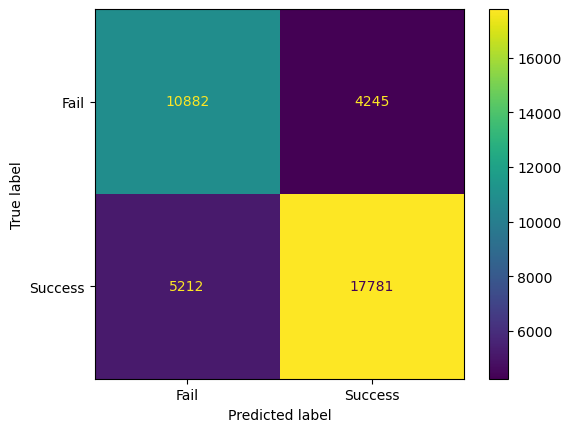

In [118]:
fpr_log, tpr_log, auc_log, scores_log = evaluate_model(logreg_grid)

There is no improvement in scores from the baseline.

### Naive Bayes

In [162]:
%%time

gnb_params = {'model__var_smoothing': np.logspace(0,-9, num=10)}

gnb_grid = fit_best_model(gnb, X, y, gnb_params)

CPU times: user 522 ms, sys: 486 ms, total: 1.01 s
Wall time: 6.25 s


In [164]:
print_model_params(gnb_grid)

Best score:      0.7093
Best estimator:  GaussianNB(var_smoothing=0.1)
Best parameters: {'model__var_smoothing': 0.1}


Training accuracy: 0.6989
Test accuracy:     0.6962
Precision:         0.9196

              precision    recall  f1-score   support

           0       0.57      0.93      0.71     15127
           1       0.92      0.54      0.68     22993

    accuracy                           0.70     38120
   macro avg       0.75      0.74      0.70     38120
weighted avg       0.78      0.70      0.69     38120



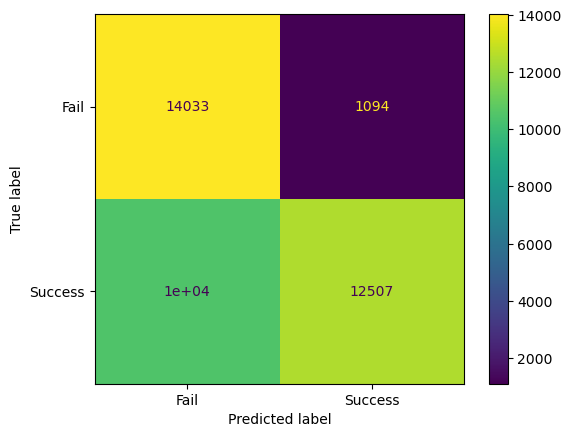

In [84]:
fpr_gnb, tpr_gnb, auc_gnb, scores_gnb = evaluate_model(gnb_grid)

Accuracy is now 0.70, improvement from baseline accuracy of 0.63.

### Random Forest

In [128]:
%%time

## random forest with gridsearch
rf_params = {
    'model__n_estimators': [300],
    'model__max_depth': [30],
    'model__min_samples_split': [0.001, 0.01],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_grid = fit_best_model(rf, X, y, rf_params)

CPU times: user 1min 39s, sys: 1.12 s, total: 1min 41s
Wall time: 2min 54s


In [129]:
print_model_params(rf_grid)

Best score:      0.7701
Best estimator:  RandomForestClassifier(max_depth=30, min_samples_split=0.001, n_estimators=300,
                       n_jobs=-1)
Best parameters: {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 0.001, 'model__n_estimators': 300}


Training accuracy: 0.7858
Test accuracy:     0.7710
Precision:         0.7812

              precision    recall  f1-score   support

           0       0.75      0.63      0.69     15127
           1       0.78      0.86      0.82     22993

    accuracy                           0.77     38120
   macro avg       0.77      0.75      0.75     38120
weighted avg       0.77      0.77      0.77     38120



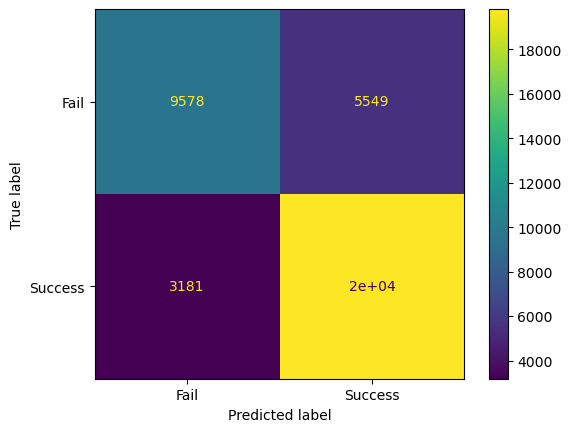

In [130]:
fpr_rf, tpr_rf, auc_rf, scores_rf = evaluate_model(rf_grid)

After tuning, accuracy is the same. However now the training score is similar, meaning we have reduced overfitting. 

### Adaboost



In [88]:
%%time

# Adaboost with randomised search CV
ada_params = [{
    'model__base_estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=5)
    ],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.1, 0.5, 1]
}]

ada_rand = fit_best_model(ada, X, y, ada_params, rand_cv=True)

CPU times: user 12.8 s, sys: 384 ms, total: 13.1 s
Wall time: 2min 20s


In [89]:
print_model_params(ada_rand)

Best score:      0.7795
Best estimator:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5)
Best parameters: {'model__n_estimators': 50, 'model__learning_rate': 0.5, 'model__base_estimator': DecisionTreeClassifier(max_depth=3)}


Training accuracy: 0.7829
Test accuracy:     0.7780
Precision:         0.8091

              precision    recall  f1-score   support

           0       0.73      0.70      0.72     15127
           1       0.81      0.83      0.82     22993

    accuracy                           0.78     38120
   macro avg       0.77      0.77      0.77     38120
weighted avg       0.78      0.78      0.78     38120



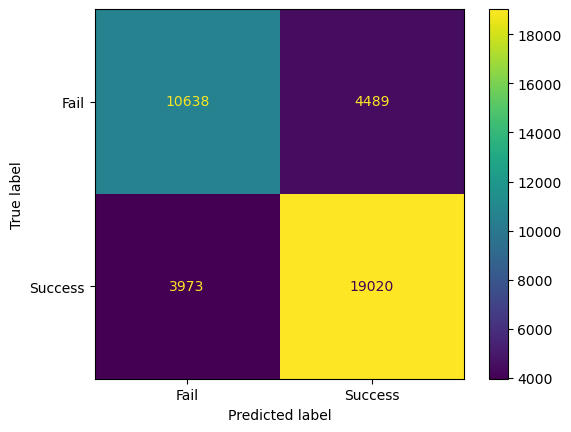

In [90]:
fpr_ada, tpr_ada, auc_ada, scores_ada = evaluate_model(ada_rand)

Accuracy has improved by 2 percentage points from baseline. 

### XGBoost

In [91]:
%%time

# XGBoost with randomised search CV
xgb_params = [ 
  {'model__n_estimators': [50, 100],
   'model__max_depth': [10, 20, 30],
   'model__learning_rate': [0.01, 0.1],
   'model__subsample': [0.7, 1],
   'model__min_child_weight': [20, 100]
  }
]

# pipe = Pipeline(steps=[('scaler', StandardScaler()), ('xgb', xgb)])
# xgb_rand = RandomizedSearchCV(estimator=pipe, param_distributions=xgb_params, cv=3, n_jobs=-1)

xgb_rand = fit_best_model(xgb, X, y, xgb_params, rand_cv=True)

CPU times: user 7min 34s, sys: 11.4 s, total: 7min 45s
Wall time: 19min 8s


In [92]:
print_model_params(xgb_rand)

Best score:      0.7822
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=100, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best parameters: {'model__subsample': 1, 'model__n_estimators': 100, 'model__min_child_weight': 100, 'model__max_depth': 20, 'model__learning_rate': 0.1}


In [145]:
xgb_best = XGBClassifier(subsample=1, n_estimators=100, min_child_weight= 100, max_depth= 20)


In [146]:
pipe_xgb = Pipeline(steps=[('scaler', StandardScaler()), ('model', xgb_best)])

In [147]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=50, missing=nan,
                               monotone_constraints=None, n_estimators=100,
        

Training accuracy: 0.7992
Test accuracy:     0.7848
Precision:         0.8095

              precision    recall  f1-score   support

           0       0.74      0.70      0.72     15127
           1       0.81      0.84      0.82     22993

    accuracy                           0.78     38120
   macro avg       0.78      0.77      0.77     38120
weighted avg       0.78      0.78      0.78     38120



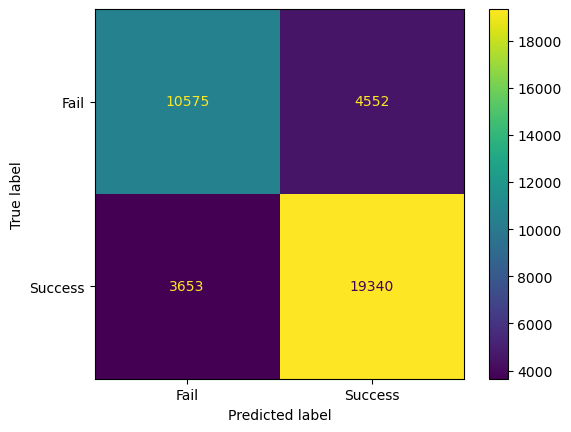

In [149]:
fpr_xgb, tpr_xgb, auc_xgb, scores_xgb = evaluate_model(xgb_rand)

Accuracy has remained the same from baseline. Precision has actually dropped by 1% point?

In [94]:
xgb_best = XGBClassifier(n_estimators=100, min_child_weight=20, max_depth=30, learning_rate=0.1, n_jobs=-1)

fit_baseline_model(xgb_best, X, y)

Training score:         0.8495
Cross validation score: 0.7825
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     15127
           1       0.81      0.83      0.82     22993

    accuracy                           0.78     38120
   macro avg       0.77      0.77      0.77     38120
weighted avg       0.78      0.78      0.78     38120




(0.8494799249727829, 0.7834732423924449, 0.7825325612872047)

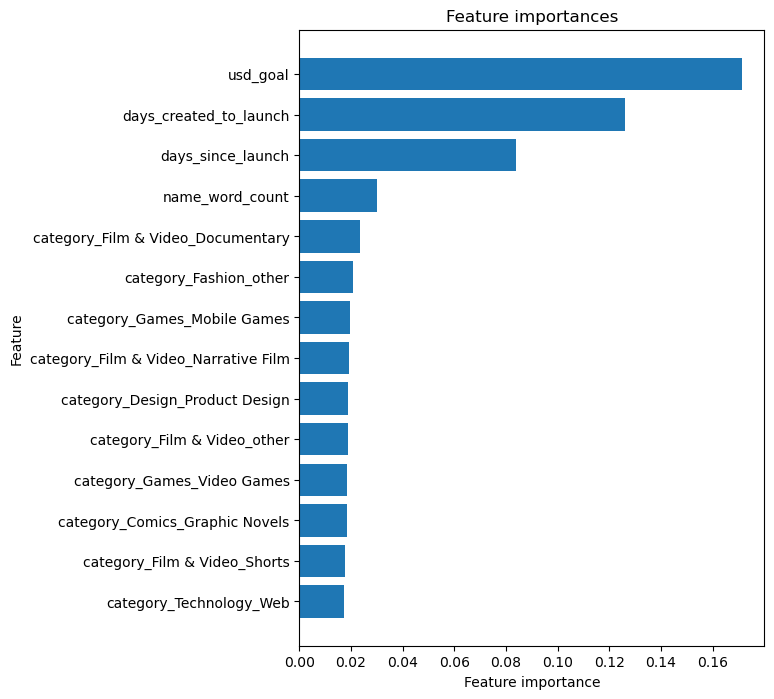

In [98]:
# Set the threshold for feature importance
threshold = 0.017

# Get the indices of the features that pass the threshold
important_idx = np.where(xgb_best.feature_importances_ > threshold)[0]

# Get the feature names and importances of the important features
important_features = X_train.columns[important_idx]
important_importances = rf_best.feature_importances_[important_idx]

# Sort the indices of the important features and importances by importance
sorted_idx = np.argsort(important_importances)[:]
sorted_important_features = important_features[sorted_idx]
sorted_important_importances = important_importances[sorted_idx]

# Plot the important features
n_important_features = important_features.shape[0]
plt.figure(figsize=(6,8))
plt.barh(range(n_important_features), sorted_important_importances, align='center') 
plt.yticks(np.arange(n_important_features), sorted_important_features) 
plt.title("Feature importances")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

The relative feature importance shows that goal, days created to launch, duration and name word count are important. 

In [165]:
# put each baseline model results into dataframe

tune_results = {
    'Log': scores_log,
    'Gaussian NB': scores_gnb,
    'Random Forest': scores_rf,
    'Adaboost': scores_ada,
    'XGBoost': scores_xgb,
}

df_tune_results = pd.DataFrame.from_dict(
    tune_results,
    orient='index',
    columns=['train_accuracy', 'test_accuracy', 'precision'])

In [166]:
df_tune_results.round(4)

,train_accuracy,test_accuracy,precision
Log,0.7523,0.7519,0.8073
Gaussian NB,0.6989,0.6962,0.9196
Random Forest,0.7858,0.7710,0.7812
Adaboost,0.7829,0.7780,0.8091
XGBoost,0.7992,0.7848,0.8095


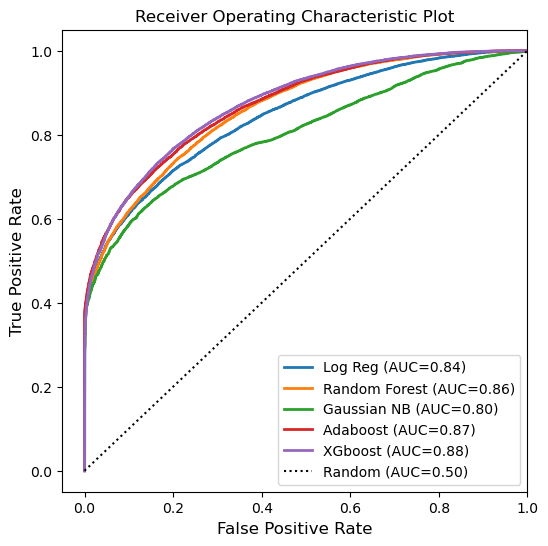

In [152]:
# plot ROC curve

plt.figure(figsize=[6,6])
plt.plot(fpr_log, tpr_log, lw=2, label='Log Reg (AUC=%0.2f)' % auc_log)
plt.plot(fpr_rf, tpr_rf, lw=2, label='Random Forest (AUC=%0.2f)' % auc_rf)
plt.plot(fpr_gnb, tpr_gnb, lw=2, label='Gaussian NB (AUC=%0.2f)' % auc_gnb)
plt.plot(fpr_ada, tpr_ada, lw=2, label='Adaboost (AUC=%0.2f)' % auc_ada)
plt.plot(fpr_xgb, tpr_xgb, lw=2, label='XGboost (AUC=%0.2f)' % auc_xgb)
plt.plot([0, 1], [0, 1], linestyle='dotted', label='Random (AUC=0.50)', color='black')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic Plot', fontsize=12)
plt.legend(loc="lower right")
plt.show()

From the ROC curves, XGboost has the best Area Under Curve (AUC) of 0.88. 

## Skewed Features - Transformation

Because the distributions for goal and days created to launch are skewed (from EDA in part 1), we try to log transform these features before modelling using the best hyperparameters.

In [167]:
# log transform pledged and goal, add 1 to avoid log(0) 
X['usd_goal'] = np.log(X['usd_goal'] + 1)

In [168]:
# log transform days created to launch
X['days_created_to_launch'] = np.log(X['days_created_to_launch'] + 1)

In [169]:
# try baseline logistic regression on log transformed data
fit_baseline_model(logreg, X, y)

Training score:         0.7705
Cross validation score: 0.7702
              precision    recall  f1-score   support

           0       0.70      0.73      0.72     15127
           1       0.82      0.79      0.81     22993

    accuracy                           0.77     38120
   macro avg       0.76      0.76      0.76     38120
weighted avg       0.77      0.77      0.77     38120




(0.7704652474455331, 0.7699632738719832, 0.7701766900272815)

Accuracy has improved by 2 percentage points from non-transformed baseline model.

In [170]:
# baseline naive bayes
fit_baseline_model(gnb, X, y)

Training score:         0.6367
Cross validation score: 0.6365
              precision    recall  f1-score   support

           0       0.52      1.00      0.68     15127
           1       1.00      0.39      0.56     22993

    accuracy                           0.63     38120
   macro avg       0.76      0.70      0.62     38120
weighted avg       0.81      0.63      0.61     38120




(0.6366557798502079, 0.633473242392445, 0.6365377548862792)

In [156]:
%%time

# use parameters from hyperparameter tuning
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=0.001, n_jobs=-1)
fit_baseline_model(rf, X, y)

Training score:         0.7707
Cross validation score: 0.7626
              precision    recall  f1-score   support

           0       0.76      0.59      0.66     15127
           1       0.76      0.88      0.82     22993

    accuracy                           0.76     38120
   macro avg       0.76      0.73      0.74     38120
weighted avg       0.76      0.76      0.75     38120


CPU times: user 54.2 s, sys: 1.81 s, total: 56 s
Wall time: 39.1 s


(0.7706882304332429, 0.7613064008394543, 0.7625952708948726)

In [116]:
%%time

# use parameters from hyperparameter tuning
xgb = XGBClassifier(n_estimators=100, min_child_weight=20, max_depth=30, learning_rate=0.1, subsample=1)
fit_baseline_model(xgb, X, y)

Training score:         0.8490
Cross validation score: 0.7822

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     15127
           1       0.81      0.83      0.82     22993

    accuracy                           0.78     38120
   macro avg       0.77      0.77      0.77     38120
weighted avg       0.78      0.78      0.78     38120

CPU times: user 55min 41s, sys: 1min 7s, total: 56min 48s
Wall time: 7min 18s


(0.848994609058356, 0.7828436516264428, 0.7822374453469485)

Log transforming features did not improve naive bayes, random forest and XGboost models.

## Conclusion

- Business goal is to increase revenue by increasing the success rate of projects
- XGBoost was selected as the best model for predicting Kickstarter project outcomes, with 79% accuracy. 
- Based on EDA and modelling, key factors driving success were funding goal, project duration, time from creation to launch, category and location.
- Most popular categories are film & video and music. Least popular were theater, journalism and dance.
- Comics had the highest proportion of successful projects while technology, food, crafts, photography and journalism had a higher proportion of failed projects.
- Technology attracts the most pledges but with a higher failure rate, suggesting potential for revenue.
- Projects based in Asia tend to have a higher success rate, while Mexico and some European countries have a higher failure rate. 


## Recommendations

- Set smaller, realistic funding goals.
- Taking time to finalise project details for launch (1~2 weeks).
- Shorter duration is better than longer. Recommend running project for 30 days or less.
- Promote projects under technology as there are large amounts of pledges
- Games, film & video projects have high success rate with relatively high total pledges, so could be promoted more.


## Next Steps

- Ideally collect our own data. Collecting data that reveal quality of the project could help increase prediction accuracy, such as presence of video, number of rewards offered, project description. 
- Deployment as a web app on the Kickstarter website that creators could use to predict outcome of their future projects, based on their inputs. 
